# OpenCV - Object Detection
## Viola–Jones object detection framework #PyVisionSeries - Episode #08

### 00 step # Import libs

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 01step # Importing the Image to Work with

In [2]:
img = cv2.imread('DATA/car_plate_6.jpg')

### 02step # Displaying Image
Next, we want you to create a function that displays the image in a larger scale and does color correcting

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

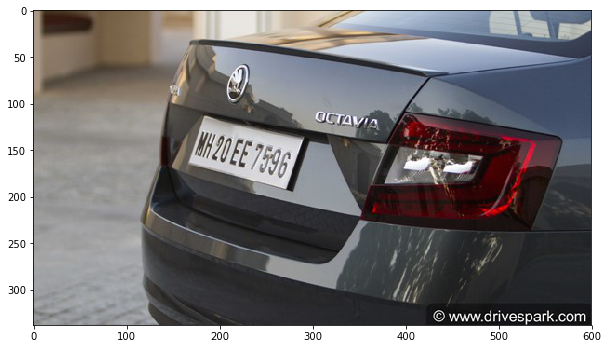

In [4]:
display(img)

In [5]:
# #alternative method
# f = 'car_plate_0.jpg'
# path = 'DATA/'+f
# img = cv2.imread(path)
# # Correcting coloring for MatPlotLib
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# i = plt.imshow(img, cmap='gray')
# img.shape

### 03 step # load the Cascade Russian Plate Number XML file.
For this step you have to download and paste inside your _/DATA_ folder the Directory _haarcascades_

In [6]:
plate_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml') 

### 04 step # A Function to Detect Plates
Next, we want to create a function that takes in the image and draws a rectangle around what it takes

In [7]:
def detect_plate(img):
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for(x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0,0,255),3)
        
    return plate_img

In [8]:
result = detect_plate(img)

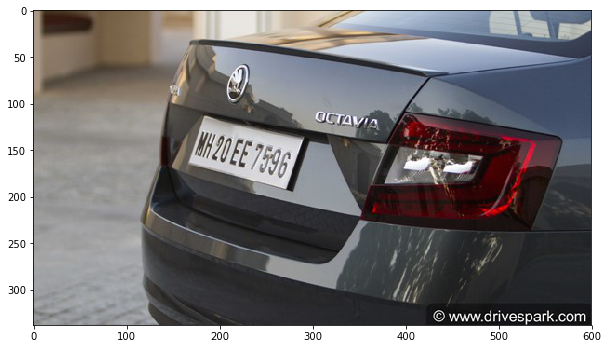

In [9]:
display(result)

### 04 step # A Function to Detect Plates

So now that I know where the license plate is, I can then blur it out.

So the way I'm going to do this is I'm actually going to cut out this region and set that as a region of interest (RoI).

Then I will blur that region and then stick it back into the original image.

In [10]:
def detect_n_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=3)
    
    for(x,y,w,h) in plate_rects:
        roi = roi[y:y+h, x:x+w]
        blured_roi = cv2.medianBlur(roi, 7)
        
        plate_img[y:y+h, x:x+w] = blured_roi
        
    return plate_img
        

In [11]:
result = detect_n_blur_plate(img)

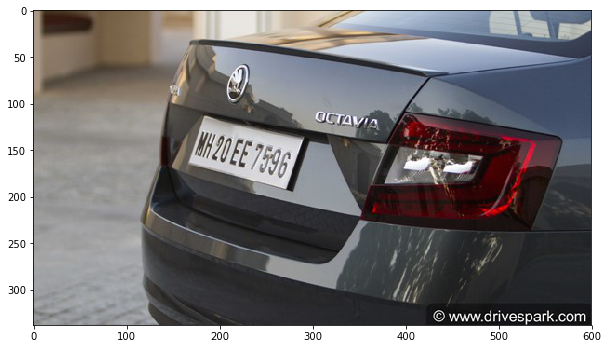

In [12]:
display(result)

In [13]:
# These are the file for this project
# Run the method on each of the images
# https://medium.com/jungletronics/manipulating-files-with-python-3f9a781287e9

from pathlib import Path

path = Path('DATA/')
files = path.iterdir()
for file in files:
    file_name = file.name
    if file_name[:9]=='car_plate' and file_name[-3:] == 'jpg':
        print(file_name)

car_plate_0.jpg
car_plate_1.jpg
car_plate_2.jpg
car_plate_3.jpg
car_plate_4.jpg
car_plate_5.jpg
car_plate_6.jpg


In [14]:
print("That's it! Thank you once again!\nI hope will be helpful.")

That's it! Thank you once again!
I hope will be helpful.
